<h2> Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<h2> Load Data

In [3]:
df = pd.read_csv('../datasets/data.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,0,0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,1,1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,2,2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
3,3,3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1
4,4,4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1


<h2> Data Preprocessing

mari buang kolom yang tidak perlu terlebih dahulu

In [4]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'brand', 'name', 'price', 'spec_rating',
       'processor', 'CPU', 'Ram', 'Ram_type', 'ROM', 'ROM_type', 'GPU',
       'display_size', 'resolution_width', 'resolution_height', 'OS',
       'warranty'],
      dtype='object')

In [5]:
df.drop(['Unnamed: 0.1', 'Unnamed: 0'] , axis=1, inplace=True)
df.head()

,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1
4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1


cek nilai yg kosong

In [6]:
df.isna().sum()

brand                0
name                 0
price                0
spec_rating          0
processor            0
CPU                  0
Ram                  0
Ram_type             0
ROM                  0
ROM_type             0
GPU                  0
display_size         0
resolution_width     0
resolution_height    0
OS                   0
warranty             0
dtype: int64

cek nilai duplikat

In [7]:
df.duplicated().sum()

0

<h2> Baseline

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
base_df = df.copy()

In [10]:
base_df.drop('name', axis=1, inplace=True)
base_df.columns

Index(['brand', 'price', 'spec_rating', 'processor', 'CPU', 'Ram', 'Ram_type',
       'ROM', 'ROM_type', 'GPU', 'display_size', 'resolution_width',
       'resolution_height', 'OS', 'warranty'],
      dtype='object')

In [11]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              893 non-null    object 
 1   price              893 non-null    int64  
 2   spec_rating        893 non-null    float64
 3   processor          893 non-null    object 
 4   CPU                893 non-null    object 
 5   Ram                893 non-null    object 
 6   Ram_type           893 non-null    object 
 7   ROM                893 non-null    object 
 8   ROM_type           893 non-null    object 
 9   GPU                893 non-null    object 
 10  display_size       893 non-null    float64
 11  resolution_width   893 non-null    float64
 12  resolution_height  893 non-null    float64
 13  OS                 893 non-null    object 
 14  warranty           893 non-null    int64  
dtypes: float64(4), int64(2), object(9)
memory usage: 104.8+ KB


In [12]:
cat_col = base_df.select_dtypes(include=['object']).columns
num_col = base_df.select_dtypes(include=['int64', 'float64']).columns

In [13]:
le = LabelEncoder()

for col in cat_col:
    base_df[col] = le.fit_transform(base_df[col])

base_df.head()

,brand,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,9,49900,73.000000,105,19,6,2,5,1,19,15.6,1920.0,1080.0,12,1
1,9,39900,60.000000,34,18,6,2,5,1,126,15.6,1920.0,1080.0,12,1
2,1,26990,69.323529,15,17,6,2,5,1,123,14.0,1920.0,1080.0,12,1
3,14,59729,66.000000,39,6,1,8,5,1,111,14.0,2240.0,1400.0,12,1
4,2,69990,69.323529,160,21,6,2,2,1,91,13.3,2560.0,1600.0,7,1


In [14]:
X = base_df.drop(['price'], axis=1)
y = base_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((803, 14), (90, 14), (803,), (90,))

untuk mencegah data leakage

In [15]:
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=123)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=123)

In [16]:
y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MSE : ', mse)
print('R2 : ', r2)

MSE :  534237549.50849235
R2 :  0.7671436140681032


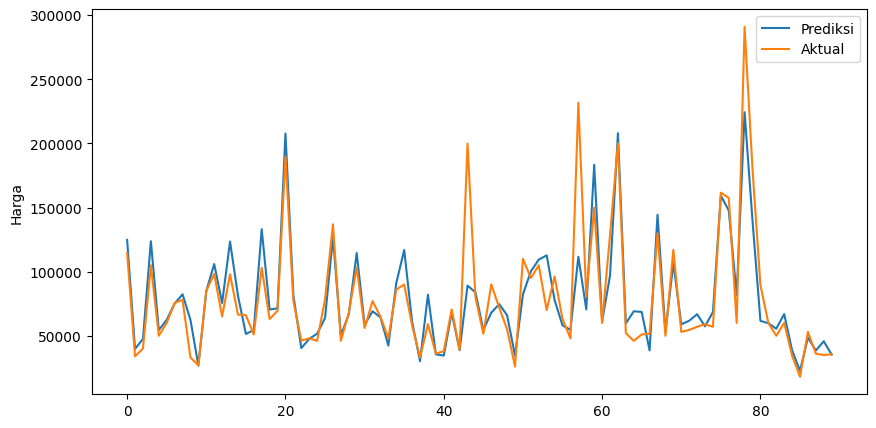

In [17]:
# plot prediksi dan aktual dalam 2 warna berbeda
plt.figure(figsize=(10,5))
plt.plot(y_pred, label='Prediksi')
plt.plot(y_test.values, label='Aktual')
plt.ylabel('Harga')
plt.legend()
plt.show()

hasil prediksi tanpa analisis lebih lanjut menunjukkan hasil yg lumayan bagus

<h2>Exploratory Data Analysis (EDA)

cek detail dari data

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              893 non-null    object 
 1   name               893 non-null    object 
 2   price              893 non-null    int64  
 3   spec_rating        893 non-null    float64
 4   processor          893 non-null    object 
 5   CPU                893 non-null    object 
 6   Ram                893 non-null    object 
 7   Ram_type           893 non-null    object 
 8   ROM                893 non-null    object 
 9   ROM_type           893 non-null    object 
 10  GPU                893 non-null    object 
 11  display_size       893 non-null    float64
 12  resolution_width   893 non-null    float64
 13  resolution_height  893 non-null    float64
 14  OS                 893 non-null    object 
 15  warranty           893 non-null    int64  
dtypes: float64(4), int64(2), o

NOTE :

- Kebanyakan dari data merupakan sebuah objek atau kolom kategorik
- Total data adalah 893

Mari cek distribusi dari kolom price yang akan menjadi target kita nanti

C:\Users\Kresna\AppData\Local\Temp\ipykernel_18028\3811929006.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


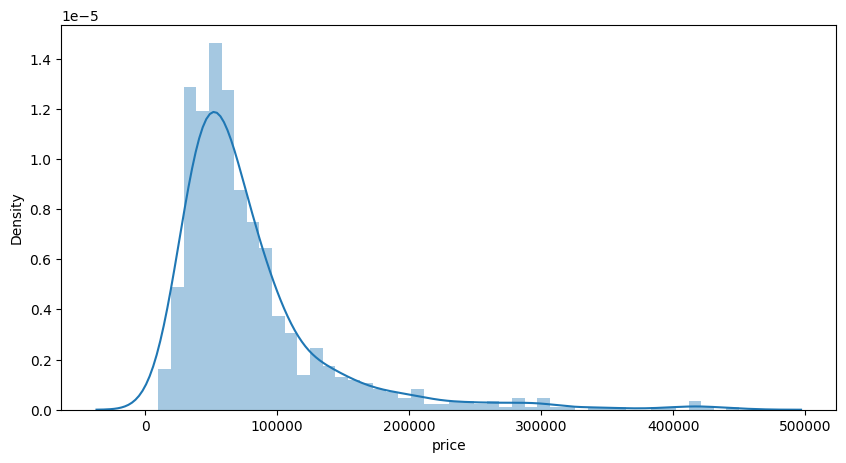

In [19]:
# plot kolom price
plt.figure(figsize=(10,5))
sns.distplot(df['price'])
plt.show()


distribusi nya terlihat condong ke kanan

C:\Users\Kresna\AppData\Local\Temp\ipykernel_18028\2080887189.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


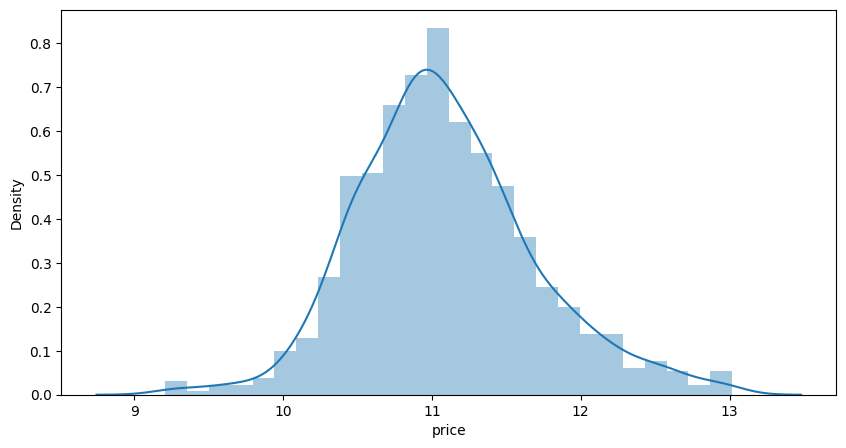

In [20]:
# transformasi skewness pada kolom price
df['price'] = np.log(df['price'])
plt.figure(figsize=(10,5))
sns.distplot(df['price'])
plt.show()

mari kita lihat sebaran data pada setiap kolom fitur kita dengan target

In [21]:
df.columns

Index(['brand', 'name', 'price', 'spec_rating', 'processor', 'CPU', 'Ram',
       'Ram_type', 'ROM', 'ROM_type', 'GPU', 'display_size',
       'resolution_width', 'resolution_height', 'OS', 'warranty'],
      dtype='object')

C:\Users\Kresna\AppData\Local\Temp\ipykernel_18028\982199193.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  brand_price_mean = df.groupby('brand').mean()['price'].sort_values(ascending=False)


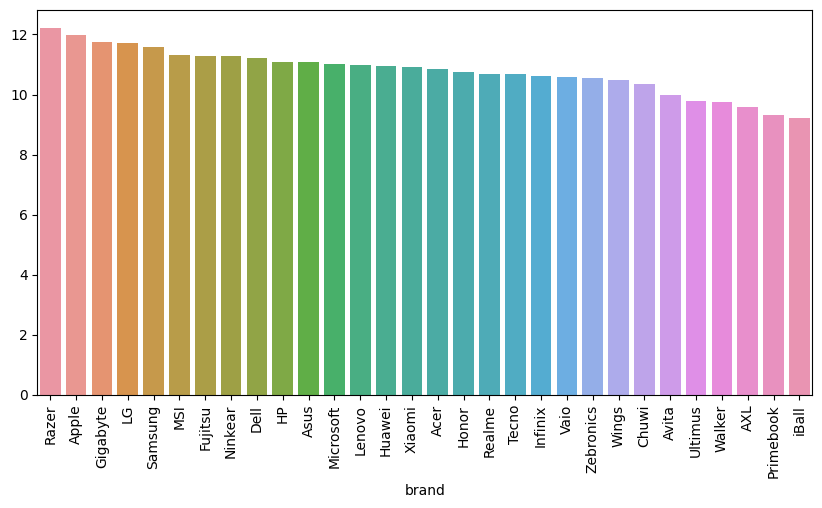

In [22]:
# plot hubungan antara brand dan price
brand_price_mean = df.groupby('brand').mean()['price'].sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=brand_price_mean.index, y=brand_price_mean.values)
plt.xticks(rotation=90)
plt.show()

dapat dilihat laptop dengan harga termahal memiliki brand razer, disusul oleh apple dan gigabyte

C:\Users\Kresna\AppData\Local\Temp\ipykernel_18028\2723919505.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  spec_rating_mean = df.groupby('spec_rating').mean()['price'].sort_values(ascending=False)


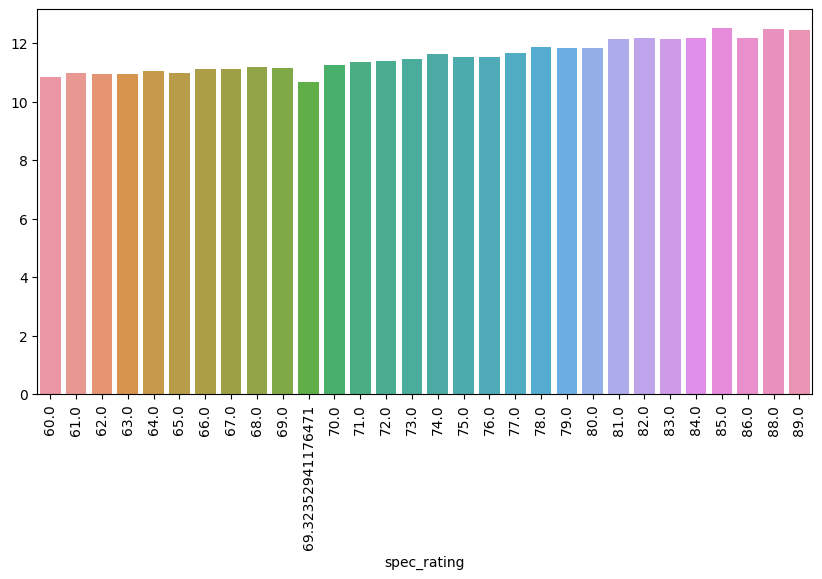

In [23]:
# plot spec rating dan price
spec_rating_mean = df.groupby('spec_rating').mean()['price'].sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=spec_rating_mean.index, y=spec_rating_mean.values)
plt.xticks(rotation=90)
plt.show()

C:\Users\Kresna\AppData\Local\Temp\ipykernel_18028\2562880034.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  processor_price_mean = df.groupby('processor').mean()['price'].sort_values(ascending=False).head(10)


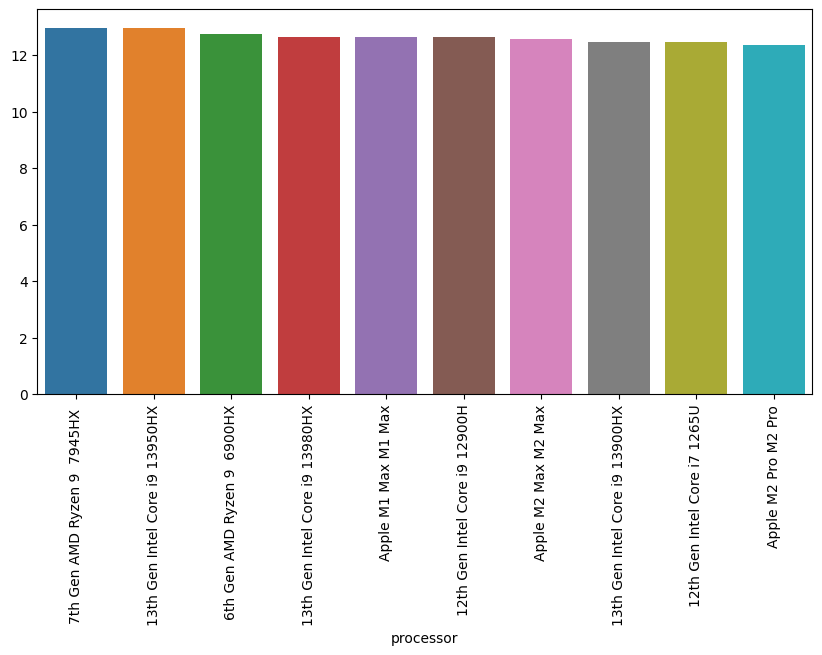

In [24]:
# plot processor dan price
processor_price_mean = df.groupby('processor').mean()['price'].sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=processor_price_mean.index, y=processor_price_mean.values)
plt.xticks(rotation=90)
plt.show()


dapat kita lihat AMD ryzer 9 generasi ke 7 menduduki peringkat pertama dengan harga tertinggi

C:\Users\Kresna\AppData\Local\Temp\ipykernel_18028\1540070537.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cpu_price_mean = df.groupby('CPU').mean()['price'].sort_values(ascending=False)


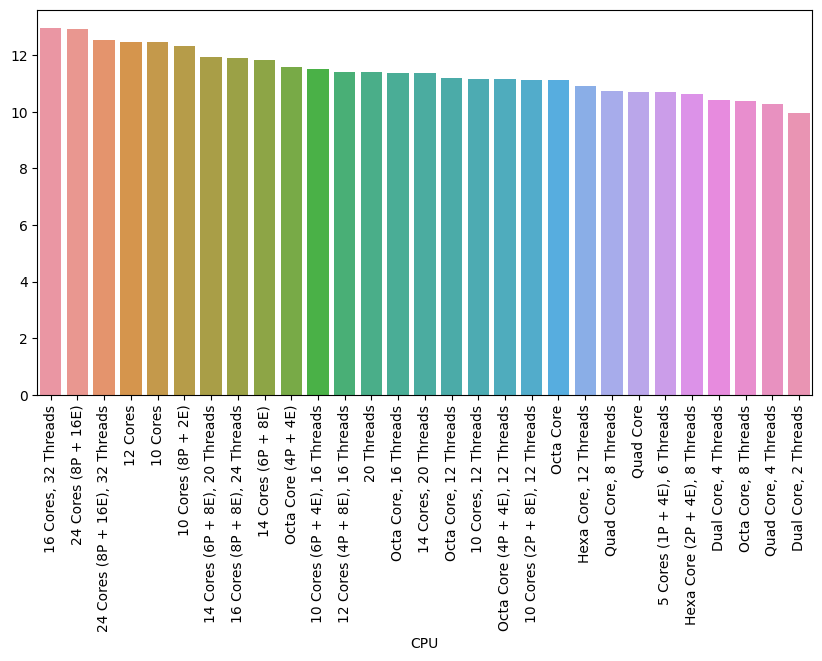

In [25]:
# plot cpu dan price
cpu_price_mean = df.groupby('CPU').mean()['price'].sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=cpu_price_mean.index, y=cpu_price_mean.values)
plt.xticks(rotation=90)
plt.show()

C:\Users\Kresna\AppData\Local\Temp\ipykernel_18028\4109305844.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ram_price_mean = df.groupby('Ram').mean()['price'].sort_values(ascending=False)


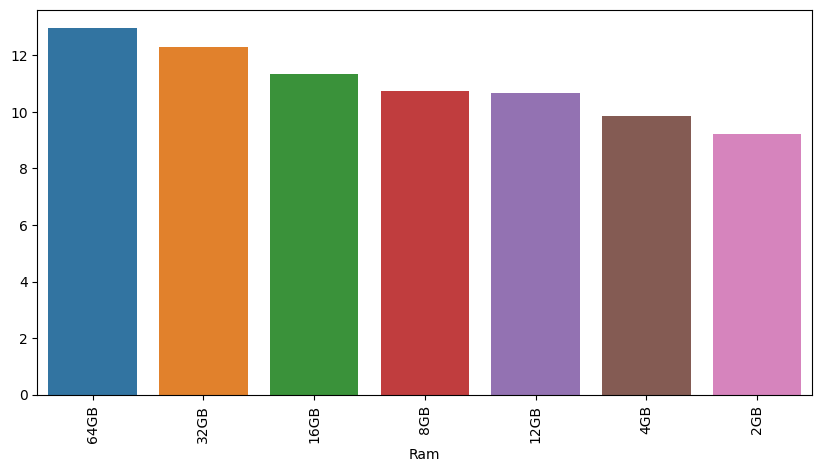

In [26]:
# plot ram dan price
ram_price_mean = df.groupby('Ram').mean()['price'].sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=ram_price_mean.index, y=ram_price_mean.values)
plt.xticks(rotation=90)
plt.show()

C:\Users\Kresna\AppData\Local\Temp\ipykernel_18028\1812071348.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ram_type_price_mean = df.groupby('Ram_type').mean()['price'].sort_values(ascending=False)


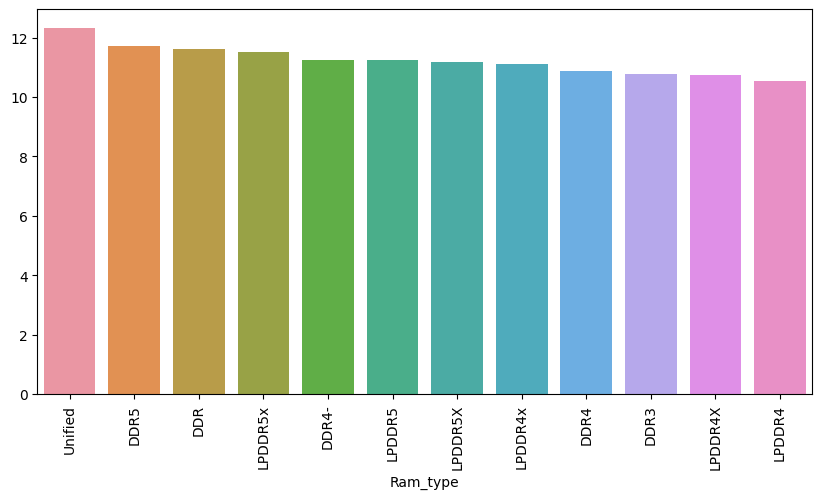

In [27]:
# plot Ram_type dan price
ram_type_price_mean = df.groupby('Ram_type').mean()['price'].sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=ram_type_price_mean.index, y=ram_type_price_mean.values)
plt.xticks(rotation=90)
plt.show()


C:\Users\Kresna\AppData\Local\Temp\ipykernel_18028\1999171553.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rom_price_mean = df.groupby('ROM').mean()['price'].sort_values(ascending=False)


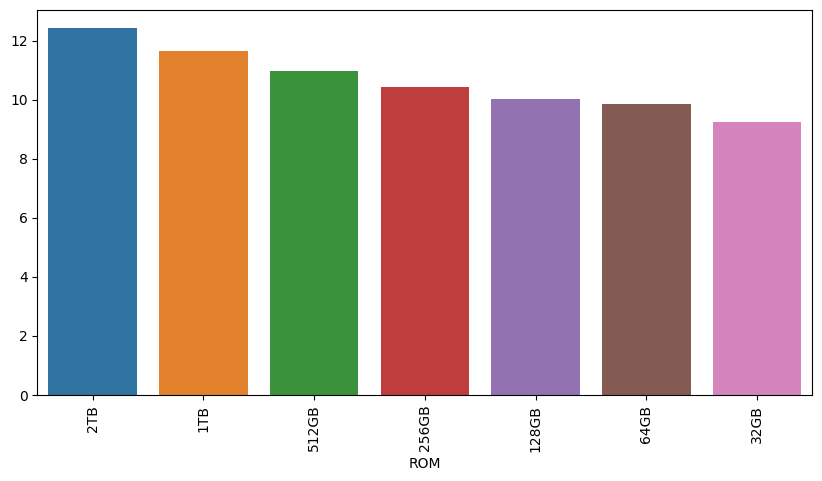

In [28]:
# plot ROM dan price
rom_price_mean = df.groupby('ROM').mean()['price'].sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=rom_price_mean.index, y=rom_price_mean.values)
plt.xticks(rotation=90)
plt.show()

C:\Users\Kresna\AppData\Local\Temp\ipykernel_18028\417880646.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rom_type_price_mean = df.groupby('ROM_type').mean()['price'].sort_values(ascending=False)


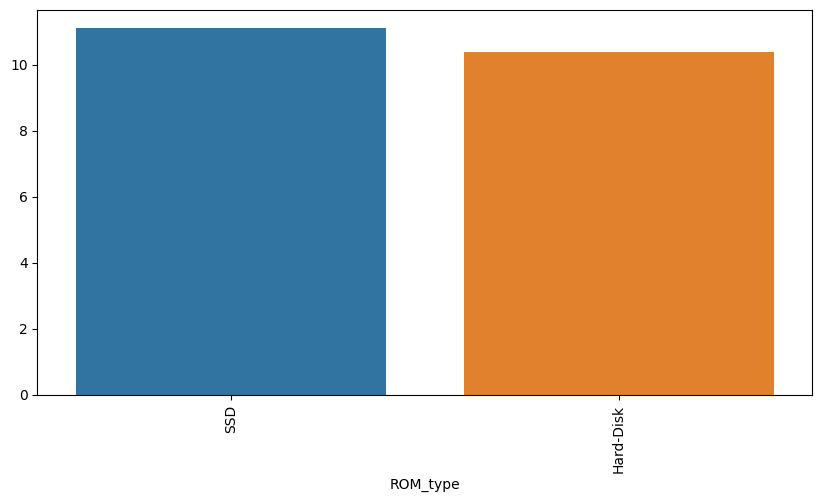

In [29]:
# plot ROM_type dan price
rom_type_price_mean = df.groupby('ROM_type').mean()['price'].sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=rom_type_price_mean.index, y=rom_type_price_mean.values)
plt.xticks(rotation=90)
plt.show()

C:\Users\Kresna\AppData\Local\Temp\ipykernel_18028\3209237805.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gpu_price_mean = df.groupby('GPU').mean()['price'].sort_values(ascending=False).head(10)


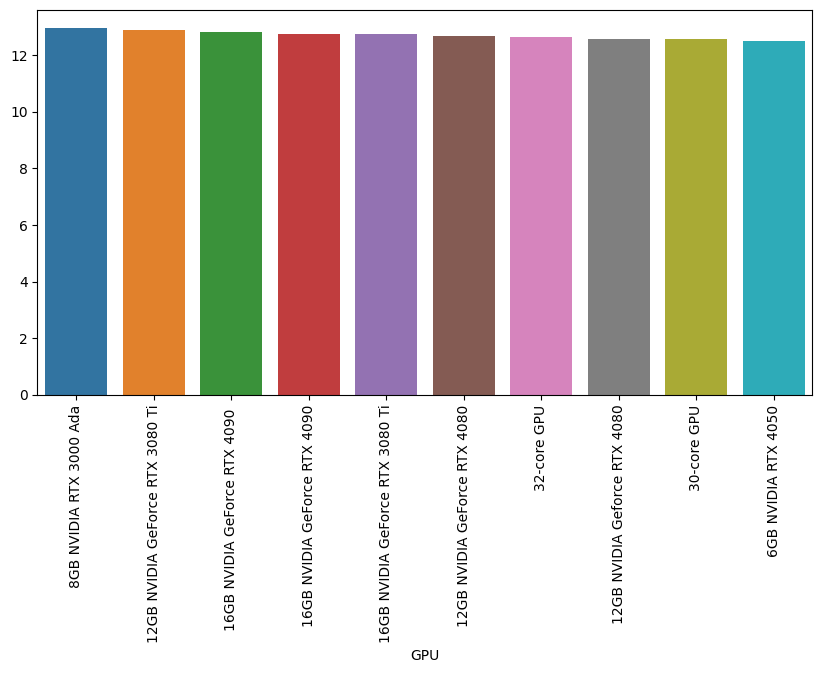

In [30]:
# plot GPU dan price
gpu_price_mean = df.groupby('GPU').mean()['price'].sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=gpu_price_mean.index, y=gpu_price_mean.values)
plt.xticks(rotation=90)
plt.show()


C:\Users\Kresna\AppData\Local\Temp\ipykernel_18028\2747804086.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  display_size_price_mean = df.groupby('display_size').mean()['price'].sort_values(ascending=False)


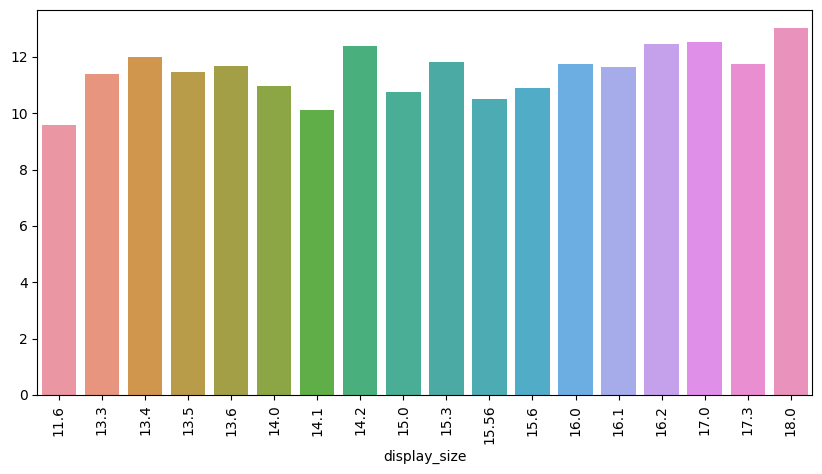

In [31]:
# plot display_size dan price
display_size_price_mean = df.groupby('display_size').mean()['price'].sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=display_size_price_mean.index, y=display_size_price_mean.values)
plt.xticks(rotation=90)
plt.show()

C:\Users\Kresna\AppData\Local\Temp\ipykernel_18028\1448967999.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  resolution_width_price_mean = df.groupby('resolution_width').mean()['price'].sort_values(ascending=False)


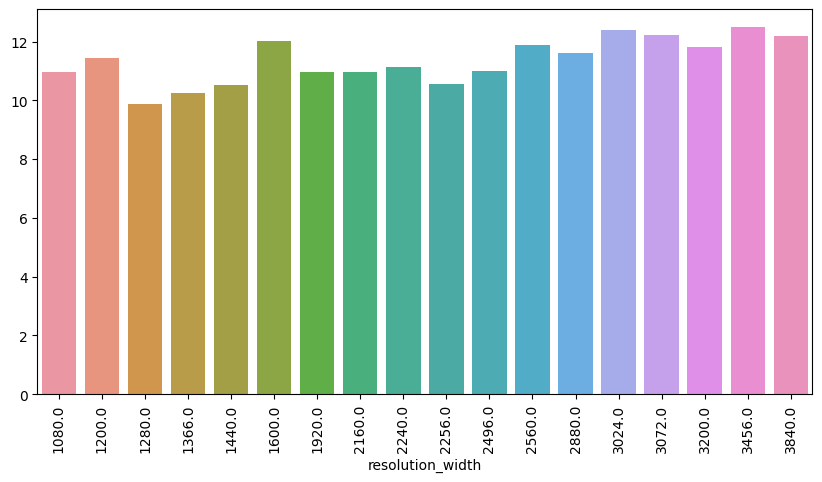

In [32]:
# plot resolution_width dan price
resolution_width_price_mean = df.groupby('resolution_width').mean()['price'].sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=resolution_width_price_mean.index, y=resolution_width_price_mean.values)
plt.xticks(rotation=90)
plt.show()

C:\Users\Kresna\AppData\Local\Temp\ipykernel_18028\3405826075.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  resolution_height_price_mean = df.groupby('resolution_height').mean()['price'].sort_values(ascending=False)


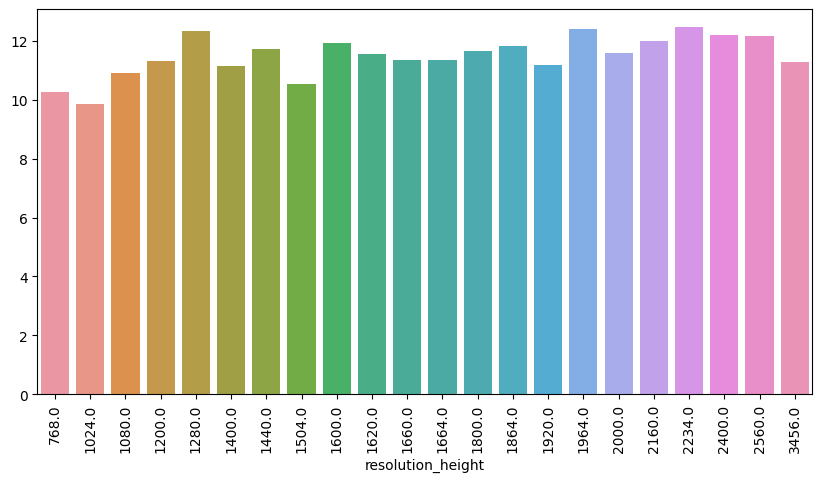

In [33]:
# plot resolution_height dan price
resolution_height_price_mean = df.groupby('resolution_height').mean()['price'].sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=resolution_height_price_mean.index, y=resolution_height_price_mean.values)
plt.xticks(rotation=90)
plt.show()

C:\Users\Kresna\AppData\Local\Temp\ipykernel_18028\1553733412.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  os_price_mean = df.groupby('OS').mean()['price'].sort_values(ascending=False)
c:\Users\Kresna\miniconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


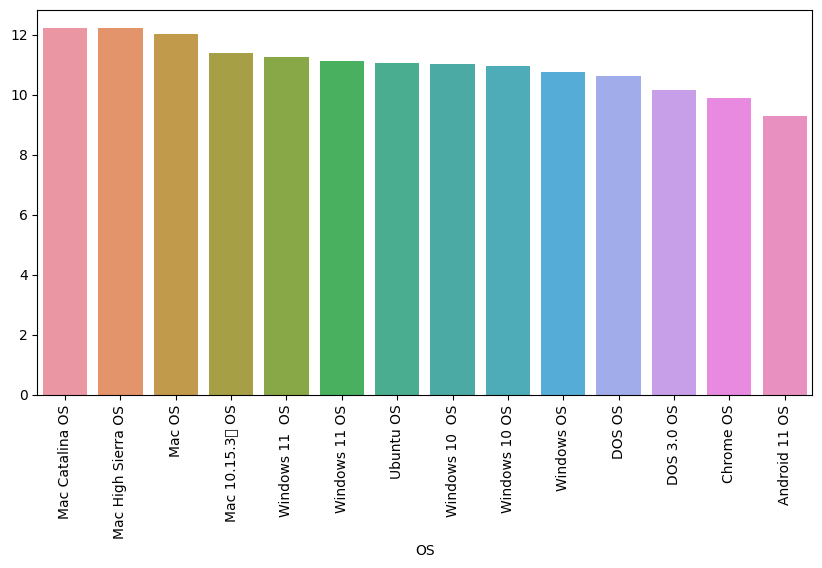

In [34]:
# plot OS dan price
os_price_mean = df.groupby('OS').mean()['price'].sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=os_price_mean.index, y=os_price_mean.values)
plt.xticks(rotation=90)
plt.show()

C:\Users\Kresna\AppData\Local\Temp\ipykernel_18028\1235859809.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  warranty_price_mean = df.groupby('warranty').mean()['price'].sort_values(ascending=False)


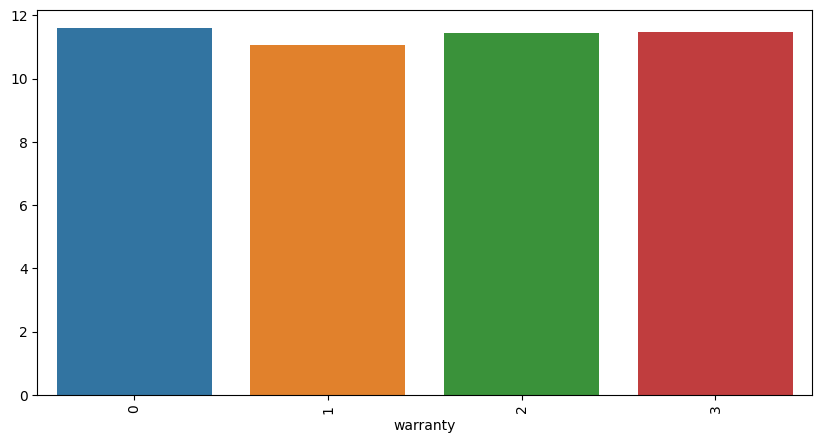

In [35]:
# plot warranty dan price
warranty_price_mean = df.groupby('warranty').mean()['price'].sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=warranty_price_mean.index, y=warranty_price_mean.values)
plt.xticks(rotation=90)
plt.show()

Jadi itulah beberapa plot dari hubungan fitur dan target, yg dapat kita pahami adalah :

- untuk beberapa fitur yg berhubungan dengan hardware laptop, seperti processor, cpu, ram, dan lainnya. Semakin bagus spesifikasi nya maka akan semakin mahal harganya. Ini adalah hal yg normal
- untuk fitur warranty, ada sedikit hal yg aneh disini karena warranty dengan nilai 0 (tidak disebutkan apa maksudnya di datasetnya) yg mana asumsi yg saya berikan adalah tanpa warranty. Rata-rata harga jualnya lebih tinggi dibandingkan dengan produk dengan warranty

cek seberapa banyak produk yg memiliki warranty 0

In [36]:
warranty0_df = df[df['warranty'] == 0]
warranty1_df = df[df['warranty'] == 1]
warranty2_df = df[df['warranty'] == 2]
warranty3_df = df[df['warranty'] == 3]

print("nilai max dan min dari setiap warranty")
print(warranty0_df['price'].max(), warranty0_df['price'].min())
print(warranty1_df['price'].max(), warranty1_df['price'].min())
print(warranty2_df['price'].max(), warranty2_df['price'].min())
print(warranty3_df['price'].max(), warranty3_df['price'].min())
print("total data dari setiap warranty")
print(warranty0_df.shape)
print(warranty1_df.shape)
print(warranty2_df.shape)
print(warranty3_df.shape)

nilai max dan min dari setiap warranty
12.128105698640447 11.141847290720753
13.01708952465783 9.21024036697585
12.948009990259552 10.491218660339424
12.421179992880925 10.819778284410283
total data dari setiap warranty
(6, 16)
(819, 16)
(59, 16)
(9, 16)


dari pengecekan diatas, rata-rata harga dari warranty 0 lebih tinggi dikarenakan jumlahnya yg sedikit tetapi punya nilai minimum yg tinggi

<h2> Feature Engeneering </h2>

mari gunakan variabel rata-rata harga untuk setiap fitur sebagai kolom baru untuk dataset kita

In [37]:
# tambahkan kolom baru yaitu mean harga setiap fitur pada df

processor_price_mean = df.groupby('processor').mean()['price'].sort_values(ascending=False)
gpu_price_mean = df.groupby('GPU').mean()['price'].sort_values(ascending=False)

df['brand_price_mean'] = df['brand'].map(brand_price_mean)
df['spec_rating_mean'] = df['spec_rating'].map(spec_rating_mean)
df['processor_price_mean'] = df['processor'].map(processor_price_mean)
df['cpu_price_mean'] = df['CPU'].map(cpu_price_mean)
df['ram_price_mean'] = df['Ram'].map(ram_price_mean)
df['ram_type_price_mean'] = df['Ram_type'].map(ram_type_price_mean)
df['rom_price_mean'] = df['ROM'].map(rom_price_mean)
df['rom_type_price_mean'] = df['ROM_type'].map(rom_type_price_mean)
df['gpu_price_mean'] = df['GPU'].map(gpu_price_mean)
df['display_size_price_mean'] = df['display_size'].map(display_size_price_mean)
df['resolution_width_price_mean'] = df['resolution_width'].map(resolution_width_price_mean)
df['resolution_height_price_mean'] = df['resolution_height'].map(resolution_height_price_mean)
df['os_price_mean'] = df['OS'].map(os_price_mean)
df['warranty_price_mean'] = df['warranty'].map(warranty_price_mean)

df.columns

C:\Users\Kresna\AppData\Local\Temp\ipykernel_18028\912461652.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  processor_price_mean = df.groupby('processor').mean()['price'].sort_values(ascending=False)
C:\Users\Kresna\AppData\Local\Temp\ipykernel_18028\912461652.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gpu_price_mean = df.groupby('GPU').mean()['price'].sort_values(ascending=False)


Index(['brand', 'name', 'price', 'spec_rating', 'processor', 'CPU', 'Ram',
       'Ram_type', 'ROM', 'ROM_type', 'GPU', 'display_size',
       'resolution_width', 'resolution_height', 'OS', 'warranty',
       'brand_price_mean', 'spec_rating_mean', 'processor_price_mean',
       'cpu_price_mean', 'ram_price_mean', 'ram_type_price_mean',
       'rom_price_mean', 'rom_type_price_mean', 'gpu_price_mean',
       'display_size_price_mean', 'resolution_width_price_mean',
       'resolution_height_price_mean', 'os_price_mean', 'warranty_price_mean'],
      dtype='object')

<h2> Modelling

drop kolom nama laptop karena tidak dibutuhkan untuk modeling

In [38]:
model_df = df.copy()
model_df.drop('name', axis=1, inplace=True)

In [39]:
model_df.columns

Index(['brand', 'price', 'spec_rating', 'processor', 'CPU', 'Ram', 'Ram_type',
       'ROM', 'ROM_type', 'GPU', 'display_size', 'resolution_width',
       'resolution_height', 'OS', 'warranty', 'brand_price_mean',
       'spec_rating_mean', 'processor_price_mean', 'cpu_price_mean',
       'ram_price_mean', 'ram_type_price_mean', 'rom_price_mean',
       'rom_type_price_mean', 'gpu_price_mean', 'display_size_price_mean',
       'resolution_width_price_mean', 'resolution_height_price_mean',
       'os_price_mean', 'warranty_price_mean'],
      dtype='object')

In [40]:
le = LabelEncoder()

for col in cat_col:
    model_df[col] = le.fit_transform(model_df[col])
    
model_df.head()

,brand,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,...,ram_price_mean,ram_type_price_mean,rom_price_mean,rom_type_price_mean,gpu_price_mean,display_size_price_mean,resolution_width_price_mean,resolution_height_price_mean,os_price_mean,warranty_price_mean
0,9,10.817776,73.000000,105,19,6,2,5,1,19,...,10.727986,10.864081,10.978867,11.107841,10.818677,10.909885,10.974625,10.907519,11.110574,11.058321
1,9,10.594132,60.000000,34,18,6,2,5,1,126,...,10.727986,10.864081,10.978867,11.107841,10.693133,10.909885,10.974625,10.907519,11.110574,11.058321
2,1,10.203222,69.323529,15,17,6,2,5,1,123,...,10.727986,10.864081,10.978867,11.107841,11.283988,10.976295,10.974625,10.907519,11.110574,11.058321
3,14,10.997573,66.000000,39,6,1,8,5,1,111,...,11.333816,11.238889,10.978867,11.107841,11.069627,10.976295,11.146731,11.146731,11.110574,11.058321
4,2,11.156108,69.323529,160,21,6,2,2,1,91,...,10.727986,10.864081,10.434798,11.107841,11.395581,11.398506,11.896787,11.927703,12.029535,11.058321


In [41]:
X = model_df.drop(['price'], axis=1)
y = model_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((803, 28), (90, 28), (803,), (90,))

In [42]:
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=123)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=123)

In [43]:
y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MSE : ', mse)
print('R2 : ', r2)

MSE :  0.0195162268774764
R2 :  0.9271488617621941


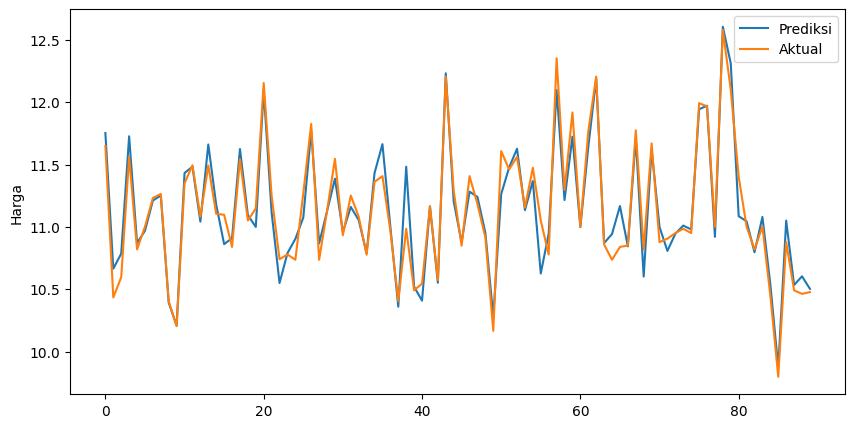

In [44]:
# plot prediksi dan aktual dalam 2 warna berbeda
plt.figure(figsize=(10,5))
plt.plot(y_pred, label='Prediksi')
plt.plot(y_test.values, label='Aktual')
plt.ylabel('Harga')
plt.legend()
plt.show()

hasil dari prediksi sudah lumayan baik, meskipun ada beberapa kegagalan di beberapa segmen

HAL YANG DAPAT DITINGKATKAN :

* Melakukan feature engineering beberapa feature sekaligus dengan target

<h2> Hyperparameter tuning

In [49]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, 40],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
}

rf = RandomForestRegressor(random_state=123)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_, grid_search.best_score_, grid_search.best_estimator_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200} 0.9338656781350805 RandomForestRegressor(max_depth=20, min_samples_leaf=2, n_estimators=200,
                      random_state=123)


mari implementasikan param hasil gridsearch

In [50]:
# evaluasi model dengan parameter terbaik
rf = RandomForestRegressor(max_depth=20, min_samples_leaf=2, n_estimators=200,
                      random_state=123)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=2, n_estimators=200,
                      random_state=123)

In [51]:
# prediksi
y_pred = rf.predict(X_test)

# evaluasi
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MSE : ', mse)
print('R2 : ', r2)

MSE :  0.018179004098177517
R2 :  0.9321405131792965


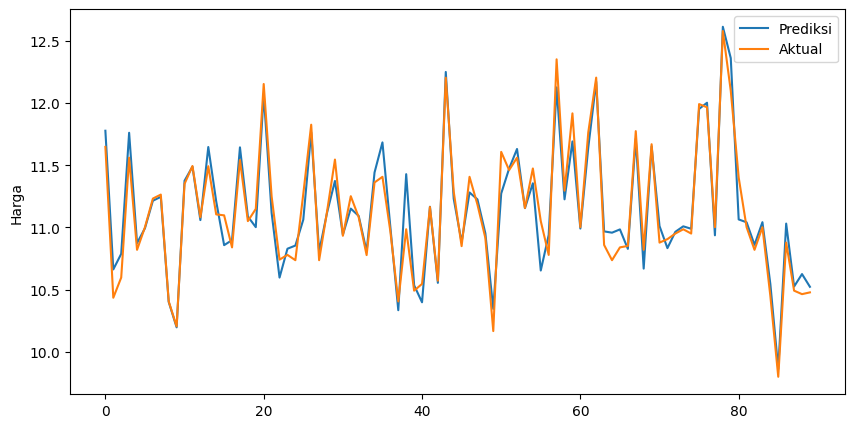

In [52]:
# plot prediksi dan aktual dalam 2 warna berbeda
plt.figure(figsize=(10,5))
plt.plot(y_pred, label='Prediksi')
plt.plot(y_test.values, label='Aktual')
plt.ylabel('Harga')
plt.legend()
plt.show()